In [1]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [2]:
data = pd.read_csv('Fraud.csv')

## DATA EXPLORATION

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# PREPROCESSING 

In [4]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['amount'].values.reshape(-1,1))
data = data.drop(['amount'],axis=1)


In [5]:
data=data.drop(['type','nameDest'],axis=1)
data.head()

,step,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,normalizedAmount
0,1,C1231006815,170136.0,160296.36,0.0,0.0,0,0,-0.281560
1,1,C1666544295,21249.0,19384.72,0.0,0.0,0,0,-0.294767
2,1,C1305486145,181.0,0.00,0.0,0.0,1,0,-0.297555
3,1,C840083671,181.0,0.00,21182.0,0.0,1,0,-0.297555
4,1,C2048537720,41554.0,29885.86,0.0,0.0,0,0,-0.278532


In [6]:
data=data.drop(['nameOrig'],axis=1)
data.head()

,step,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,normalizedAmount
0,1,170136.0,160296.36,0.0,0.0,0,0,-0.281560
1,1,21249.0,19384.72,0.0,0.0,0,0,-0.294767
2,1,181.0,0.00,0.0,0.0,1,0,-0.297555
3,1,181.0,0.00,21182.0,0.0,1,0,-0.297555
4,1,41554.0,29885.86,0.0,0.0,0,0,-0.278532


## SPLITTING DATA INTO X & Y

In [7]:
X = data.iloc[:, data.columns != 'isFraud']
Y = data.iloc[:, data.columns == 'isFraud']

In [8]:
Y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [10]:
X_train.shape

(4453834, 7)

In [11]:
X_test.shape

(1908786, 7)

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
random_forest = RandomForestClassifier(n_estimators=100)

In [14]:
random_forest.fit(X_train,Y_train.values.ravel())

RandomForestClassifier()

In [15]:
Y_pred = random_forest.predict(X_test)

In [16]:
random_forest.score(X_test,Y_test)

0.9995960783450842

In [17]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [19]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)

Confusion matrix, without normalization
[[1906298      69]
 [    702    1717]]


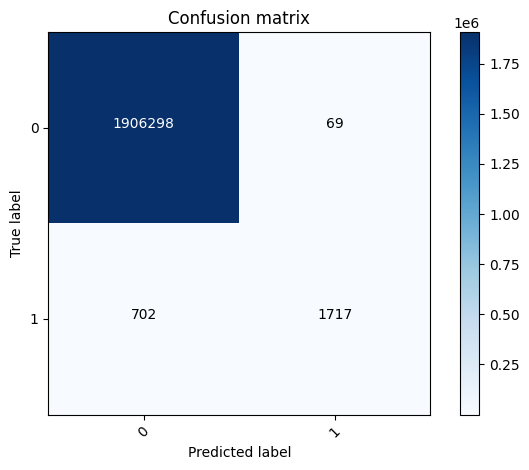

In [20]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [21]:
plt.show()

In [22]:
Y_pred = random_forest.predict(X)


In [23]:
cnf_matrix = confusion_matrix(Y,Y_pred.round())

Confusion matrix, without normalization
[[6354338      69]
 [    704    7509]]


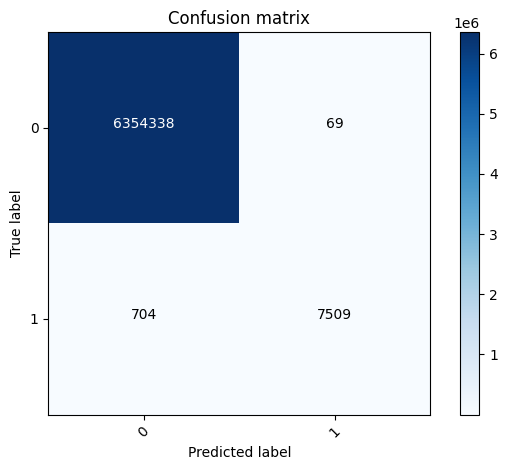

In [24]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])